In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Источник:
https://www.kaggle.com/datasets/pkdarabi/cardetection/data

In [ ]:
!pip install ultralytics

In [5]:
import cv2
from ultralytics import YOLO
import os
import random

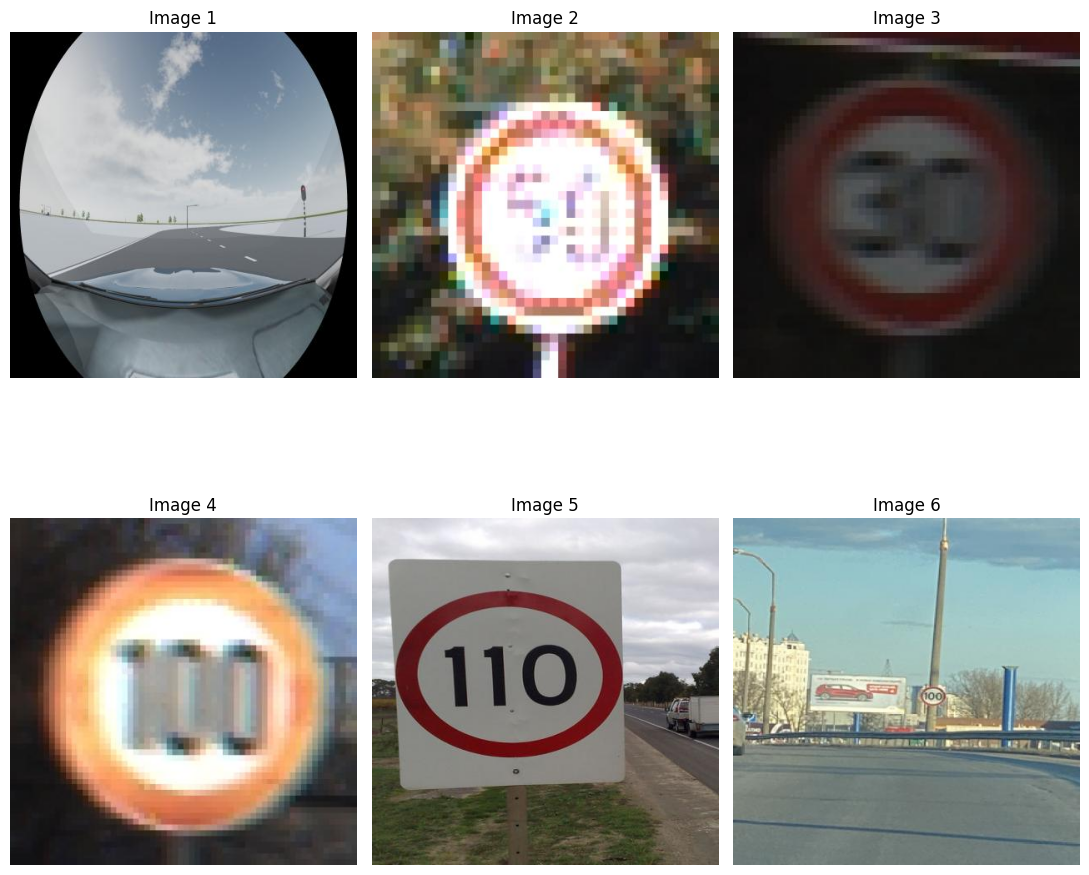

In [15]:
Image_dir = '/kaggle/input/cardetection/car/train/images'

num_samples = 6
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(2, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [16]:
model = YOLO("yolov8n.pt") 

In [18]:
!pip install --upgrade ultralytics ray

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 23.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0


In [19]:
train_model = model.train(data="/kaggle/input/cardetection/car/data.yaml",epochs = 100, batch = -1, optimizer = 'auto')

Ultralytics 8.3.32 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardetection/car/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:04<00:00, 800.25it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla P100-PCIE-16GB) 15.89G total, 7.55G reserved, 0.74G allocated, 7.60G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.889         22.21         20.74        (1, 3, 640, 640)                    list
     3013773       16.42         0.994         31.05         26.65        (2, 3, 640, 640)                    list
     3013773       32.84         1.286         24.22          20.5        (4, 3, 640, 640)                    list
     3013773       65.67         1.812         24.79         31.19        (8, 3, 640, 640)                    list
     3013773       131.3  

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:04<00:00, 848.77it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 616.32it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00040625000000000004), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.39G     0.7397       2.84      1.105         56        640: 100%|██████████| 136/136 [00:39<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]


                   all        801        944      0.211      0.431      0.271      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.37G     0.7269       2.36      1.083         40        640: 100%|██████████| 136/136 [00:37<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


                   all        801        944      0.321      0.532      0.442      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.38G     0.7484       2.05      1.085         38        640: 100%|██████████| 136/136 [00:37<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]


                   all        801        944      0.694      0.574      0.615        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.37G     0.7344      1.722      1.081         47        640: 100%|██████████| 136/136 [00:37<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


                   all        801        944      0.682      0.645       0.71      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.37G     0.7071      1.463      1.052         43        640: 100%|██████████| 136/136 [00:37<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]


                   all        801        944      0.705      0.657      0.752      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.36G     0.6847      1.307      1.044         47        640: 100%|██████████| 136/136 [00:37<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.69it/s]

                   all        801        944      0.826      0.765      0.829      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.36G     0.6844      1.189       1.04         44        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]

                   all        801        944      0.879      0.719      0.834      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.38G      0.668      1.117      1.033         49        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.73it/s]

                   all        801        944      0.874      0.783      0.855       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.36G     0.6615      1.052      1.029         34        640: 100%|██████████| 136/136 [00:37<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]

                   all        801        944      0.862      0.764      0.851      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.37G     0.6423      0.979      1.018         38        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]

                   all        801        944        0.9      0.808      0.898      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.38G     0.6384     0.9497      1.014         42        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]

                   all        801        944      0.886      0.793       0.88       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.36G     0.6327     0.9028      1.009         34        640: 100%|██████████| 136/136 [00:37<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]

                   all        801        944      0.886      0.787      0.879      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.37G     0.6238     0.8945      1.008         42        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]

                   all        801        944       0.93      0.807      0.908      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.36G     0.6226     0.8552      1.003         50        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]

                   all        801        944      0.928      0.815      0.907       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.36G     0.6245      0.831      1.009         44        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]

                   all        801        944       0.92      0.818      0.916       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.36G     0.6174     0.8092     0.9961         40        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]

                   all        801        944      0.933      0.844      0.925      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.36G     0.5998     0.7775     0.9929         37        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.68it/s]

                   all        801        944      0.936      0.815      0.918      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.36G     0.6027     0.7874     0.9965         36        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]


                   all        801        944       0.93      0.818      0.911      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.38G     0.6009     0.7645     0.9954         41        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]

                   all        801        944       0.95       0.85      0.929      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.37G     0.5944      0.753     0.9935         41        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]

                   all        801        944      0.932      0.842      0.928      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.36G     0.5993     0.7443     0.9871         53        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]

                   all        801        944      0.928      0.827      0.914      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.36G     0.5855     0.7178     0.9861         40        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]

                   all        801        944      0.925      0.874      0.931      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.36G     0.5953     0.7345     0.9933         44        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]

                   all        801        944      0.896      0.835      0.912       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.36G     0.5803     0.7185     0.9866         40        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]

                   all        801        944      0.932      0.858      0.931      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.36G      0.584     0.7005     0.9863         40        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]

                   all        801        944      0.955      0.839      0.935      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.36G     0.5811     0.7073     0.9858         40        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]

                   all        801        944      0.946      0.868      0.939      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.38G     0.5764     0.6649     0.9828         41        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]

                   all        801        944      0.907      0.877      0.934      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.36G     0.5858     0.6828     0.9852         41        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.69it/s]


                   all        801        944      0.944      0.851      0.932      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.36G      0.565     0.6573     0.9795         56        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]

                   all        801        944      0.928      0.881       0.94      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.36G     0.5757     0.6764     0.9802         38        640: 100%|██████████| 136/136 [00:36<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]

                   all        801        944      0.934      0.868      0.938      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.36G     0.5704     0.6658     0.9728         48        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]

                   all        801        944      0.933      0.881      0.945      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.38G     0.5706     0.6539     0.9709         40        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]

                   all        801        944      0.958       0.86      0.949      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.37G     0.5565     0.6274     0.9681         47        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]

                   all        801        944       0.94      0.894      0.952       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.38G     0.5562     0.6407     0.9711         40        640: 100%|██████████| 136/136 [00:37<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.70it/s]

                   all        801        944      0.922      0.878      0.943      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.36G     0.5667     0.6307     0.9712         49        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.66it/s]

                   all        801        944      0.934      0.889      0.947      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.37G     0.5604     0.6247     0.9726         44        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]

                   all        801        944      0.922      0.913      0.955      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.37G     0.5554     0.6081      0.966         37        640: 100%|██████████| 136/136 [00:37<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]

                   all        801        944      0.926      0.884      0.944      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.36G     0.5515      0.609     0.9684         39        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]

                   all        801        944      0.934       0.89      0.947       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.38G     0.5542     0.6104     0.9688         43        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]

                   all        801        944      0.953      0.899      0.957       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.36G     0.5566     0.5989     0.9626         47        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.90it/s]

                   all        801        944      0.955      0.866      0.949      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.36G     0.5432     0.5903     0.9648         46        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]

                   all        801        944      0.906      0.905       0.95      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.37G     0.5444     0.5849     0.9612         49        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]

                   all        801        944      0.923      0.885      0.939      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.38G     0.5479     0.5809     0.9643         43        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]

                   all        801        944      0.929      0.917      0.961      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.36G     0.5406     0.5767     0.9592         40        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]

                   all        801        944      0.958      0.876      0.954      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.38G     0.5439     0.5792     0.9642         41        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]

                   all        801        944      0.918      0.899      0.941      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.38G     0.5358     0.5603     0.9602         51        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]

                   all        801        944      0.948      0.886      0.955      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.38G     0.5466      0.576     0.9609         50        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.69it/s]

                   all        801        944       0.95      0.891      0.954      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.36G     0.5271     0.5498     0.9558         45        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        801        944      0.955      0.885      0.954      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.36G     0.5237     0.5328     0.9548         45        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.61it/s]

                   all        801        944      0.941      0.913      0.957      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.38G     0.5255     0.5491     0.9551         36        640: 100%|██████████| 136/136 [00:37<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]

                   all        801        944      0.952       0.91      0.955      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.38G     0.5249     0.5476     0.9527         53        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]

                   all        801        944      0.966      0.897      0.962       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.36G     0.5254     0.5421     0.9556         44        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]

                   all        801        944      0.957      0.904      0.959      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.37G     0.5171     0.5342     0.9548         37        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]

                   all        801        944      0.939      0.913      0.957      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.37G     0.5242     0.5316     0.9489         45        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.77it/s]

                   all        801        944      0.946      0.915      0.961      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.36G     0.5261     0.5221     0.9537         39        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]

                   all        801        944      0.937      0.917       0.96      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.36G     0.5186     0.5287     0.9553         56        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]

                   all        801        944      0.957       0.91      0.962      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.36G     0.5128     0.5162     0.9476         47        640: 100%|██████████| 136/136 [00:37<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]

                   all        801        944       0.96      0.921      0.966      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.38G     0.5128     0.5207     0.9454         47        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]

                   all        801        944      0.963      0.885      0.962      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.36G     0.5157     0.5214     0.9519         54        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]

                   all        801        944       0.95      0.922      0.962      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.37G     0.5127     0.5208     0.9447         49        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]

                   all        801        944      0.946      0.933      0.967      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.38G      0.503     0.4908     0.9439         45        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]

                   all        801        944      0.956        0.9      0.966      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.36G     0.5023     0.4891     0.9467         48        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]

                   all        801        944      0.958      0.931      0.969      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.38G     0.4977     0.4973      0.949         44        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]

                   all        801        944      0.945      0.921      0.968      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.36G      0.512     0.4985     0.9449         51        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]

                   all        801        944      0.957      0.935       0.97      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.38G     0.5013     0.5128     0.9465         46        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]

                   all        801        944      0.946      0.931      0.965      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.36G     0.5013     0.4902     0.9451         47        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]

                   all        801        944      0.945      0.925      0.968       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.36G     0.5066     0.4923     0.9462         50        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]

                   all        801        944      0.958      0.925      0.968       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.36G     0.4919      0.482     0.9421         34        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]

                   all        801        944      0.954      0.923      0.967      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.36G     0.4962     0.4905     0.9404         46        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        801        944      0.946      0.921      0.963      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.36G      0.494     0.4783     0.9398         53        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]

                   all        801        944      0.951      0.932      0.967      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.36G     0.4923     0.4665     0.9435         53        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]

                   all        801        944      0.947      0.934      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.36G     0.4918     0.4664     0.9366         43        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]

                   all        801        944      0.966      0.905      0.968      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.36G     0.4914     0.4674     0.9391         38        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]

                   all        801        944      0.944      0.927      0.965      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.36G     0.4957     0.4814     0.9384         35        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]

                   all        801        944      0.948      0.941       0.97      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.36G     0.4874     0.4603     0.9362         34        640: 100%|██████████| 136/136 [00:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]

                   all        801        944      0.956      0.912      0.966      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.36G     0.4885     0.4695     0.9365         45        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]

                   all        801        944      0.945      0.923      0.966      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.38G     0.4844      0.459     0.9373         48        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]

                   all        801        944      0.959      0.918      0.966      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.36G     0.4762     0.4555     0.9369         38        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.67it/s]

                   all        801        944      0.955      0.934      0.971       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.36G     0.4747     0.4428     0.9335         43        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]

                   all        801        944      0.951      0.933      0.969       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.36G     0.4794     0.4425     0.9366         45        640: 100%|██████████| 136/136 [00:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]

                   all        801        944      0.955      0.931      0.971      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.37G     0.4702     0.4562     0.9359         60        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]

                   all        801        944      0.961      0.931      0.973      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.37G     0.4745      0.442     0.9311         44        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]

                   all        801        944       0.95      0.944      0.974      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.36G     0.4805     0.4434     0.9373         46        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]

                   all        801        944      0.959      0.929      0.972      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.36G     0.4651     0.4338     0.9328         48        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]

                   all        801        944      0.953      0.934      0.971      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.36G     0.4815     0.4418     0.9329         38        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]

                   all        801        944      0.954      0.931      0.972      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.36G     0.4709     0.4286     0.9329         34        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]

                   all        801        944      0.954      0.929      0.972      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.36G      0.462     0.4181     0.9259         38        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]

                   all        801        944      0.948      0.941      0.972      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.37G     0.4558      0.417     0.9274         45        640: 100%|██████████| 136/136 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.66it/s]

                   all        801        944      0.949      0.937      0.971      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.36G     0.4601      0.407     0.9246         44        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]

                   all        801        944      0.954      0.936      0.973      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.36G     0.4642     0.4181     0.9239         51        640: 100%|██████████| 136/136 [00:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]

                   all        801        944      0.961      0.933      0.973      0.843


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.35G     0.4689       0.28     0.8898         23        640: 100%|██████████| 136/136 [00:37<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]

                   all        801        944      0.954      0.939      0.972      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.35G     0.4633     0.2771     0.8886         26        640: 100%|██████████| 136/136 [00:36<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]

                   all        801        944       0.95      0.933       0.97      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.35G     0.4621     0.2794     0.8927         23        640: 100%|██████████| 136/136 [00:36<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]

                   all        801        944      0.953      0.931      0.969      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.35G     0.4525     0.2684     0.8864         24        640: 100%|██████████| 136/136 [00:36<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]

                   all        801        944      0.958      0.926       0.97      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.35G     0.4558      0.272     0.8875         20        640: 100%|██████████| 136/136 [00:36<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]

                   all        801        944      0.947      0.934      0.971      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.36G     0.4479     0.2635     0.8836         28        640: 100%|██████████| 136/136 [00:36<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.77it/s]

                   all        801        944      0.959      0.921      0.971      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.35G      0.447     0.2612     0.8838         25        640: 100%|██████████| 136/136 [00:36<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]

                   all        801        944      0.948      0.929      0.972      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.35G     0.4456      0.258      0.881         21        640: 100%|██████████| 136/136 [00:36<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]

                   all        801        944      0.957      0.929      0.972      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.35G     0.4452     0.2563     0.8838         23        640: 100%|██████████| 136/136 [00:36<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]

                   all        801        944      0.961      0.929      0.972      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.35G     0.4433     0.2563     0.8812         24        640: 100%|██████████| 136/136 [00:36<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]

                   all        801        944      0.961      0.926      0.972      0.846



100 epochs completed in 1.174 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.32 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]


                   all        801        944      0.957      0.929      0.973       0.85
           Green Light         87        122      0.879      0.811      0.907       0.54
             Red Light         74        108      0.879       0.74      0.851      0.543
       Speed Limit 100         52         52      0.927      0.984      0.992        0.9
       Speed Limit 110         17         17          1       0.88      0.983      0.908
       Speed Limit 120         60         60      0.989      0.983      0.994      0.943
        Speed Limit 20         56         56      0.973      0.982      0.987      0.886
        Speed Limit 30         71         74      0.947      0.972       0.99      0.922
        Speed Limit 40         53         55      0.922      0.982      0.985      0.898
        Speed Limit 50         68         71          1      0.912      0.979      0.881
        Speed Limit 60         76         76      0.948      0.934       0.98      0.903
        Speed Limit 7

In [22]:
# Загружаем лучший результат
Valid_model = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')

In [23]:
Valid_model.predict(source="/kaggle/input/cardetection/video.mp4", show=True,save = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) /kaggle/input/cardetection/video.mp4: 640x640 1 Stop, 7.2ms
video 1/1 (frame 2/508) /kaggle/input/cardetection/video.mp4: 640x640 1 Stop, 6.4ms
video 1/1 (frame 3/508) /kaggle/input/cardetection/video.mp4: 640x640 1 Stop, 6.1ms
video 1/1 (frame 4/508) /kaggle/input/cardetection/video.mp4: 640x640 1 Speed Limit 10, 6.0ms
video 1/1 (frame 5/508) /kaggle/inpu

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
     

In [2]:
import cv2
from ultralytics import YOLO

# Загрузка модели YOLOv8
model = YOLO('yolov8n.pt')

# Открытие видеопотока
video_path = '/kaggle/input/v123456/1476204_People_1280x720.mp4'
cap = cv2.VideoCapture(video_path)

# Проверка, что видео удалось открыть
if not cap.isOpened():
    print("Ошибка при открытии видеофайла")
    exit()

# Получение свойств видео
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Создание объекта VideoWriter для записи видео
output_path = 'output_video.avi'  # Путь для сохранения видео
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Кодек для сжатия видео
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Обработка кадров видео
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Обработка кадра с использованием YOLO
    results = model(frame)

    # Аннотированный кадр
    annotated_frame = results[0].plot()

    # Запись кадра в выходной файл
    out.write(annotated_frame)

# Завершение работы с видео
cap.release()
out.release()
print(f'Видео сохранено как {output_path}')



0: 384x640 4 persons, 1 car, 3 handbags, 1 frisbee, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 car, 3 handbags, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 4 handbags, 1 frisbee, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 car, 4 handbags, 1 frisbee, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 handbag, 1 tie, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 2 handbags, 1 tie, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 3 handbags, 1 frisbee, 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 1.1ms postprocess